# Project #4: Stream Analytics
**Implementation Report**

Big Data Management Systems (Associate Prof. Damianos Chatziantoniou)\
Theodoros Plessas, 8160192 (t8160192@aueb.gr)

## 1. Introduction
Microsoft Azure Stream Analytics is a real-time event processing engine created for the age of big data, being able to analyze massive amounts of data using queries written in an SQL-like language. Applications include anything that might involve distributed, large-scale generation of data points ("events") such as Internet of Things systems.

In this report I demonstrate proficiency in using Stream Analytics by setting up a processing environment and running queries using real-time randomly generated data, as well as reference data.

## 2. Account creation

A Microsoft Azure account was created using my university e-mail address.

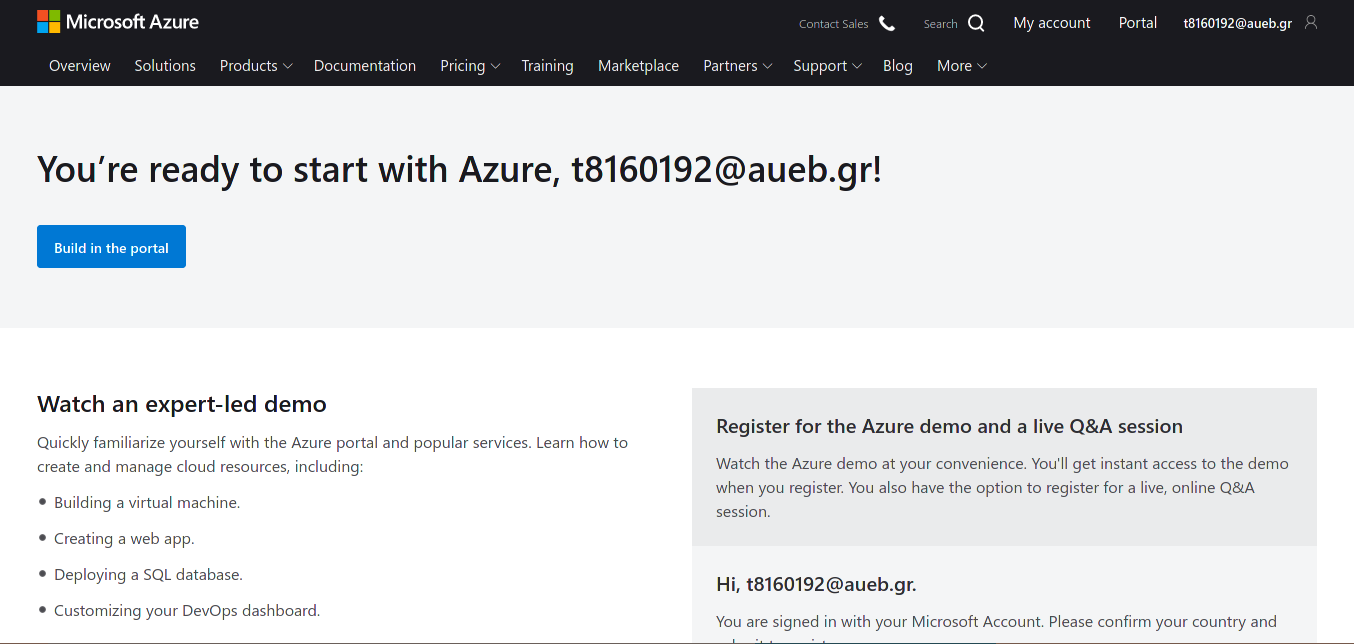

## 3. Event Hub setup

An event hub namespace including one unit set to three partitions was created.

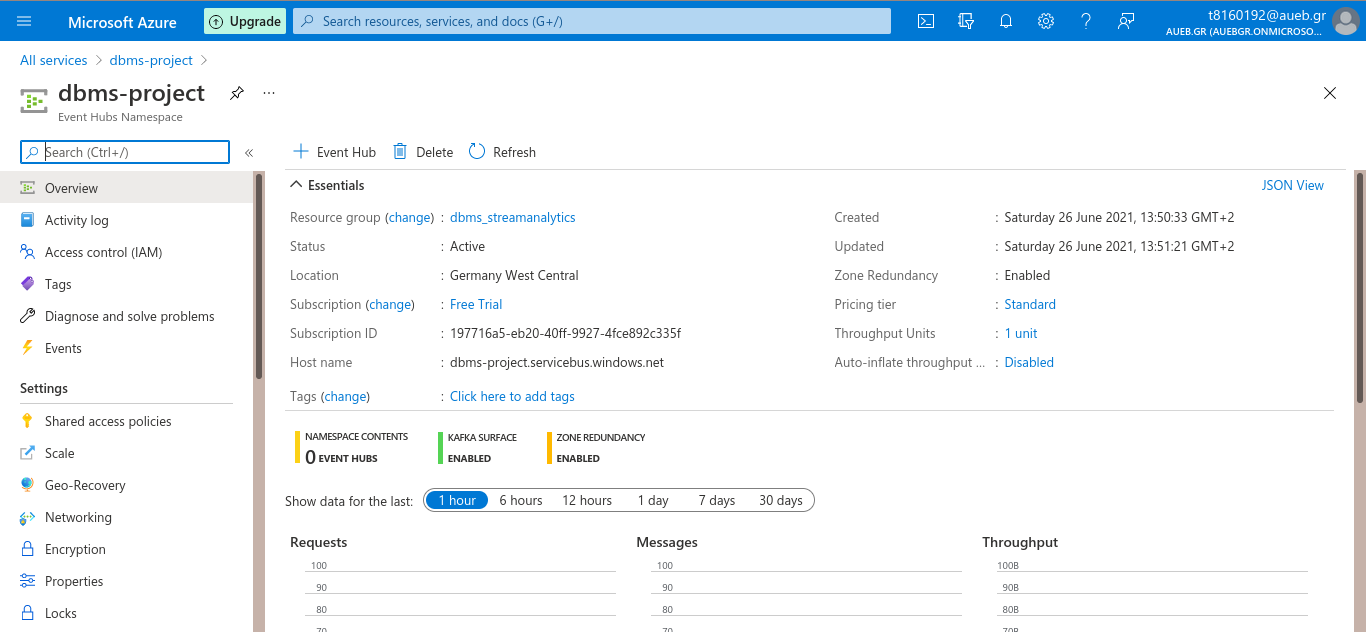

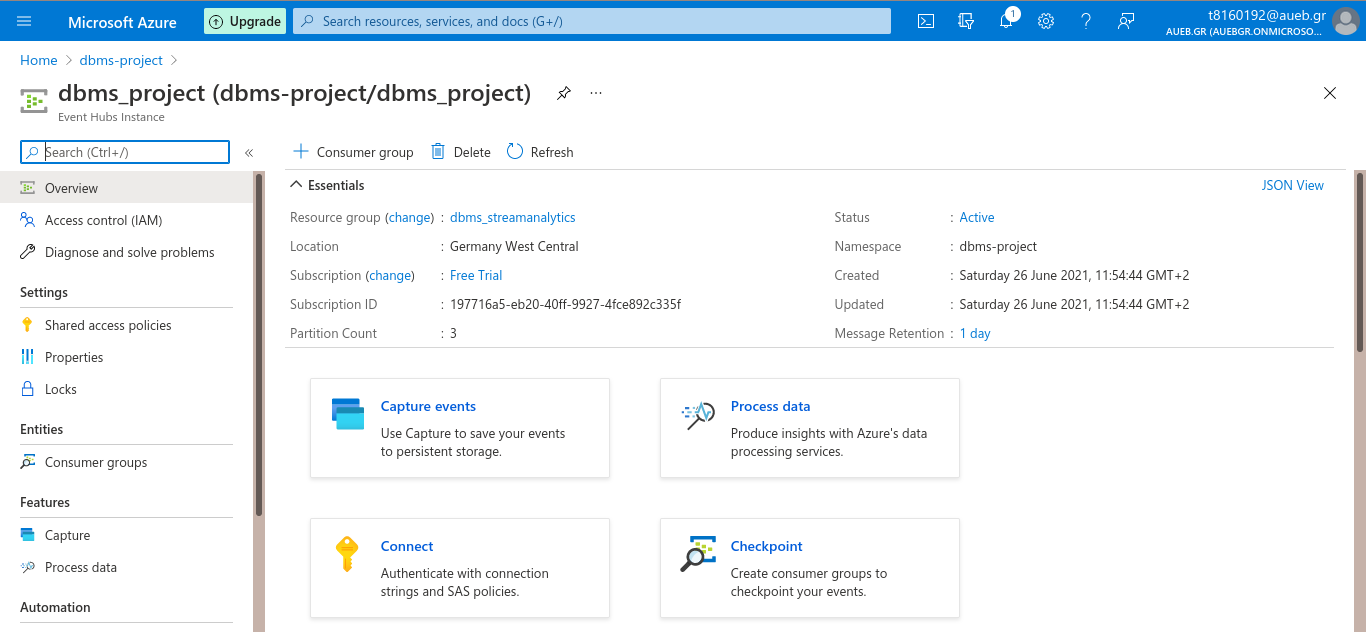

## 4. Shared Access Policy setup

A Shared Access Policy with write permissions, alongside a Shared Access Signature (using [Sandrino Di Mattia's utility](https://github.com/sandrinodimattia/RedDog/releases)) was created in order to feed the data into the event hub.

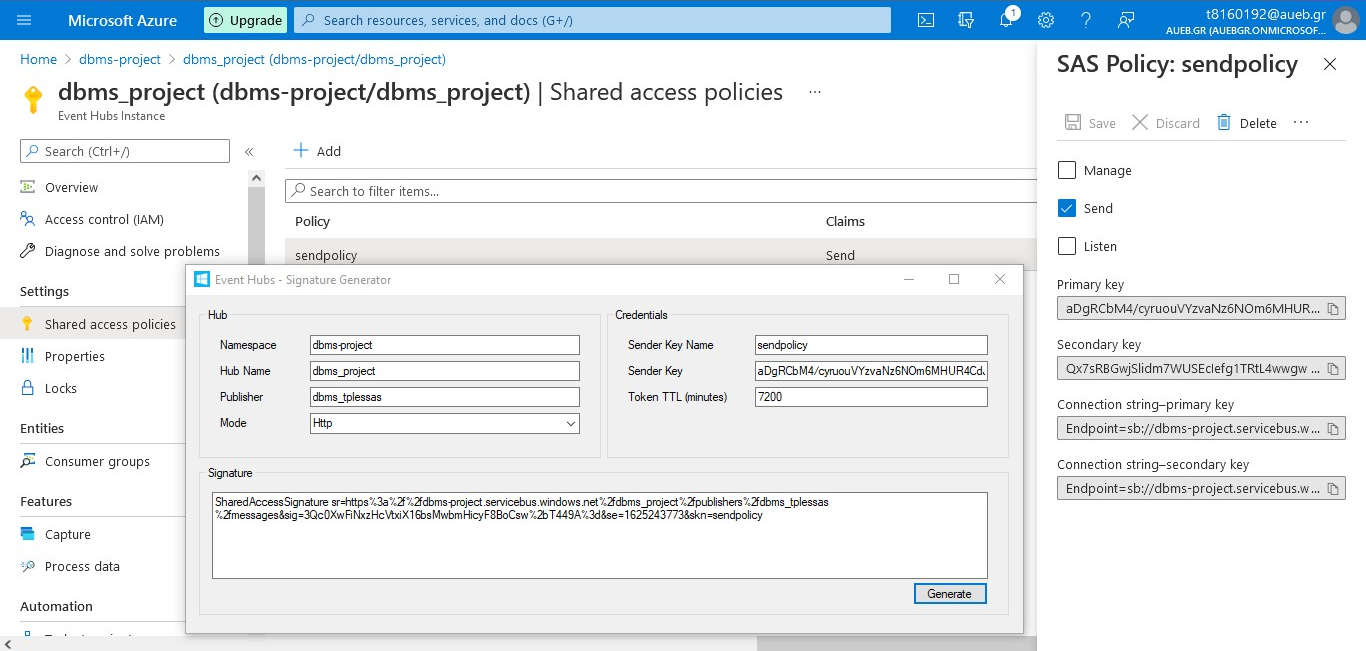

## 5. Generator setup

The random data generator was updated with the Shared Access Signature created in the previous step.

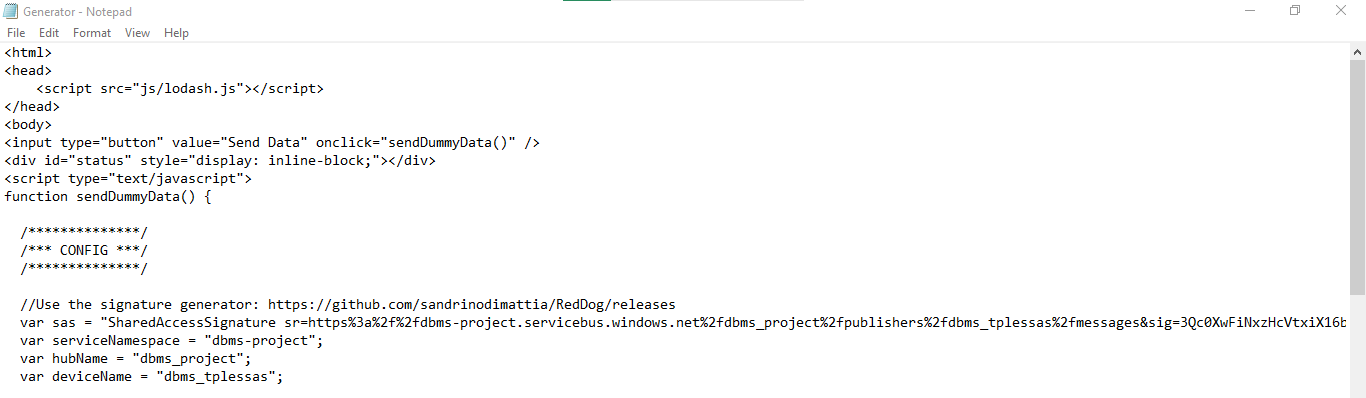

## 6. Random data generation

The generator was started, with data successfully trickling into the Event Hub at a steady pace.

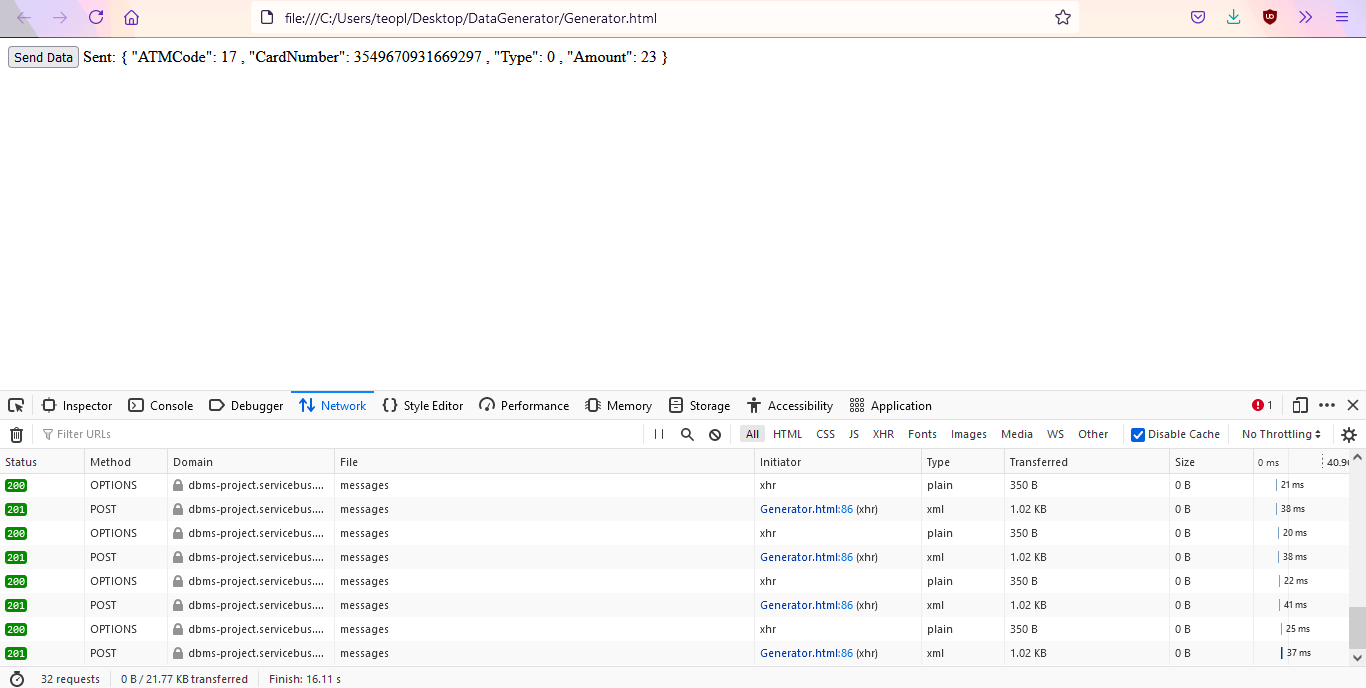

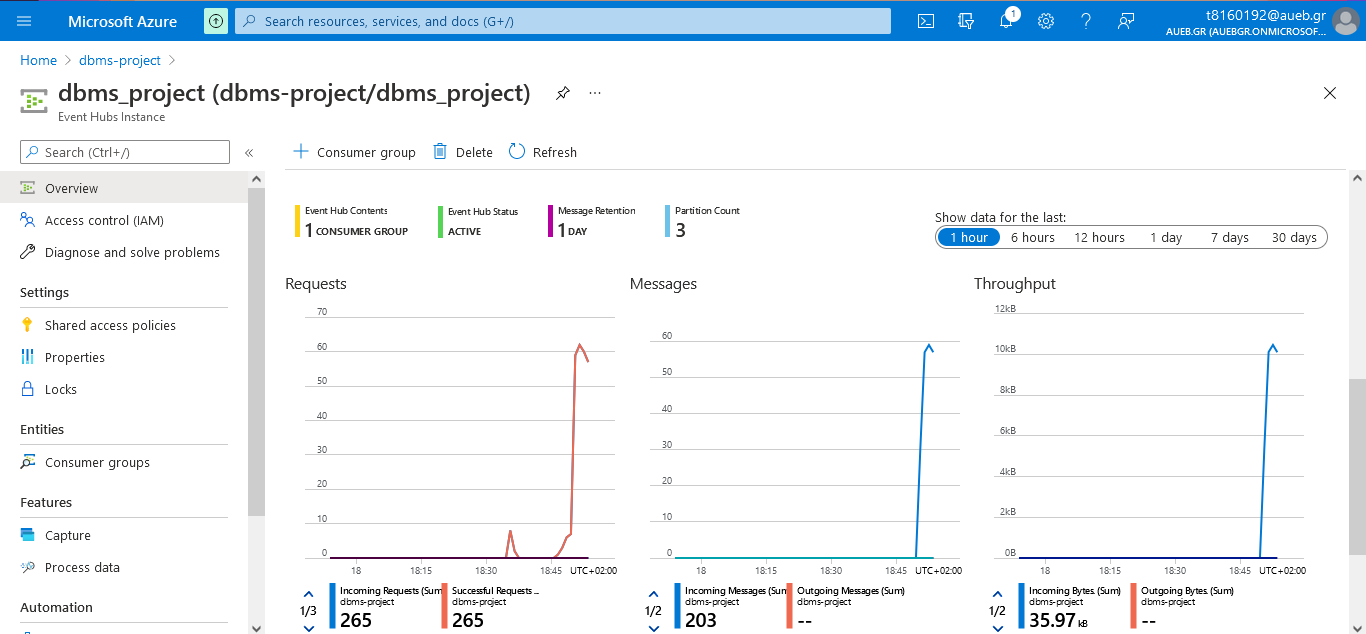

## 7. Storage account setup

A storage account was created in order to store the reference data to be used in the queries, as well as their output.

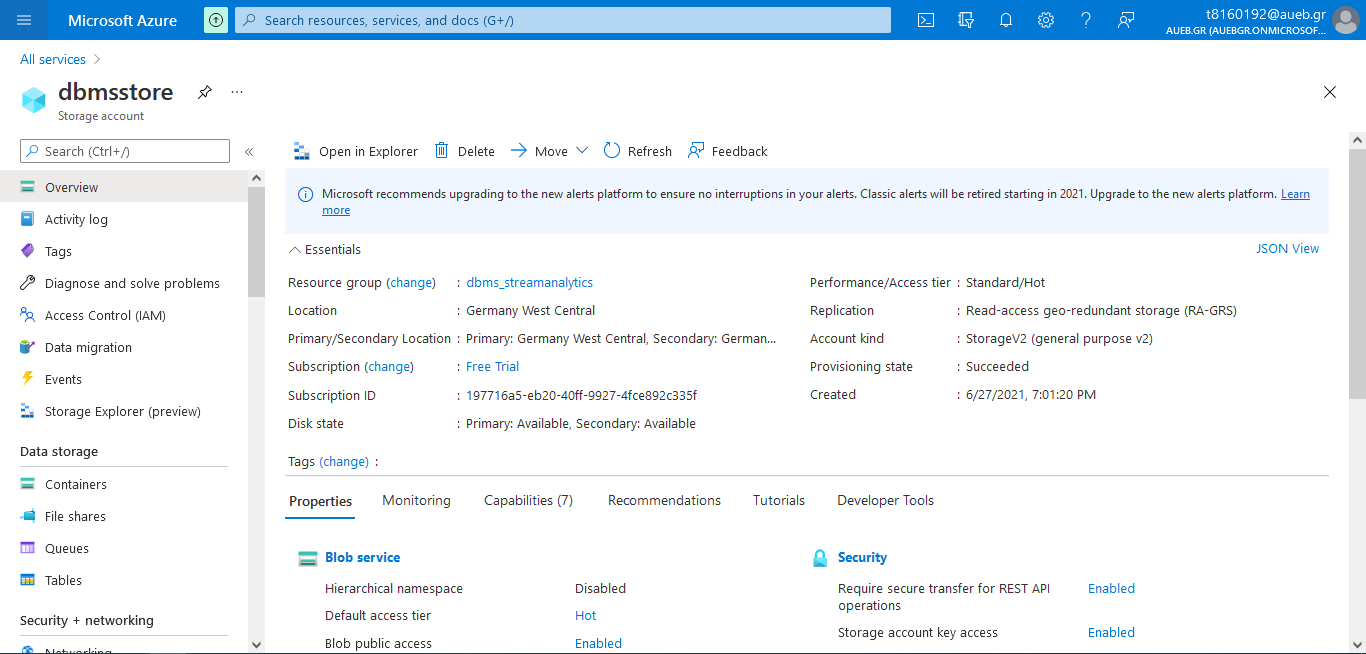

## 8. Container setup

A blob container was created and the reference JSON files were uploaded.

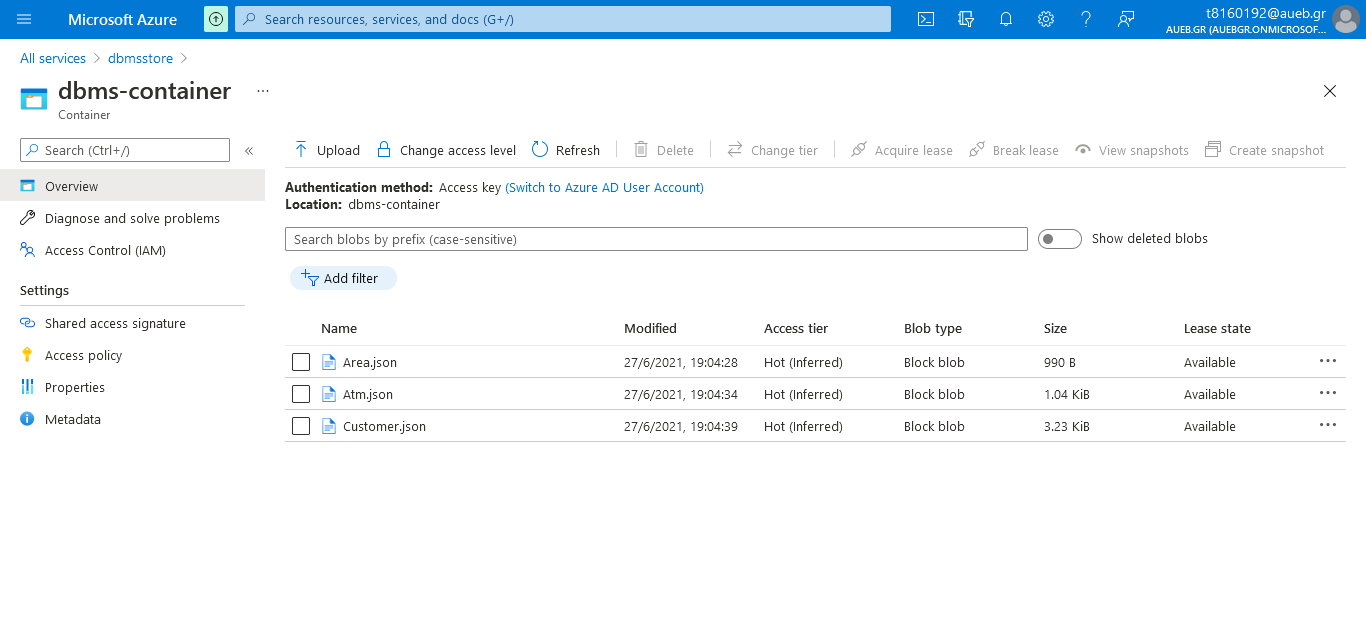

## 9. Stream Analytics job setup

A job to run queries on the incoming data was created.

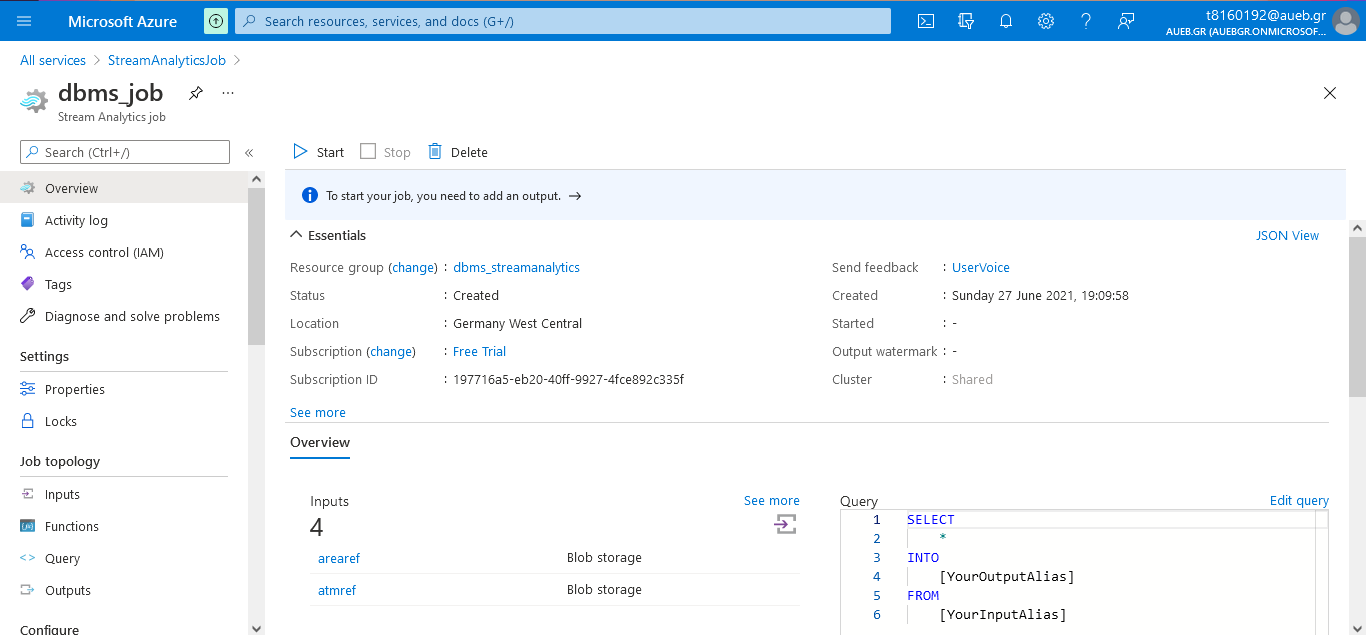

## 10. Input setup

The reference data, as well as the Event Hub stream were set as inputs for the job. Successful setup of the stream input was confirmed by sampling data from it.

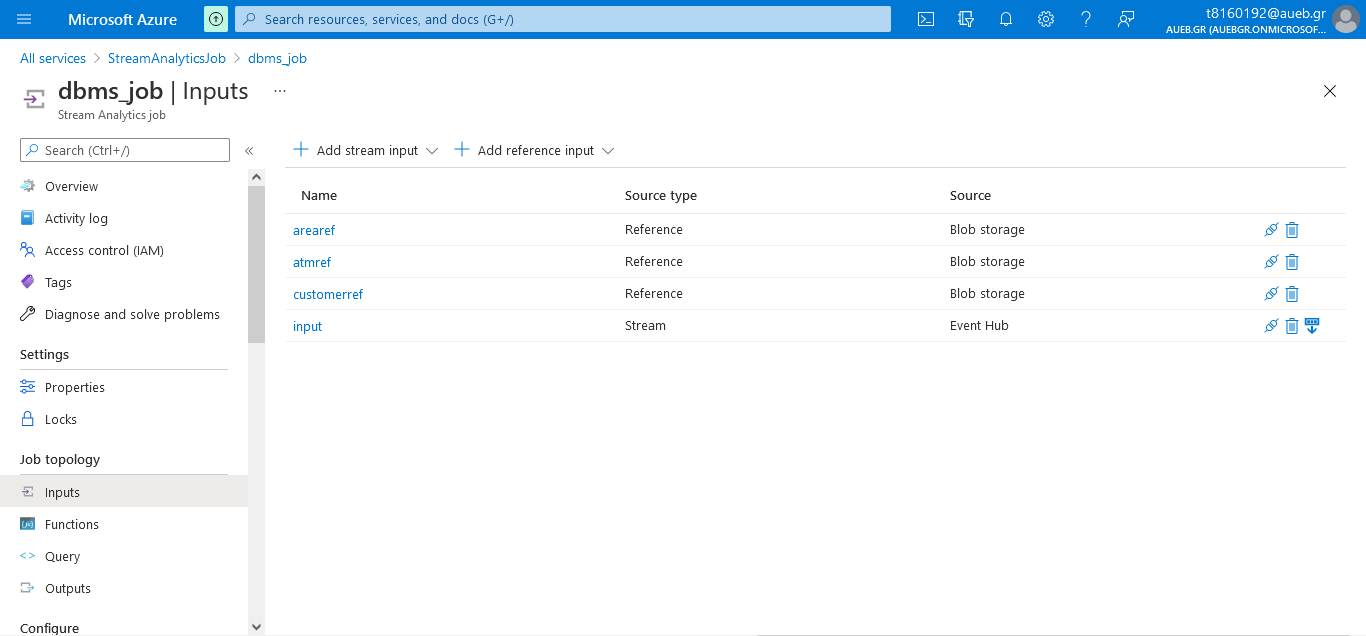

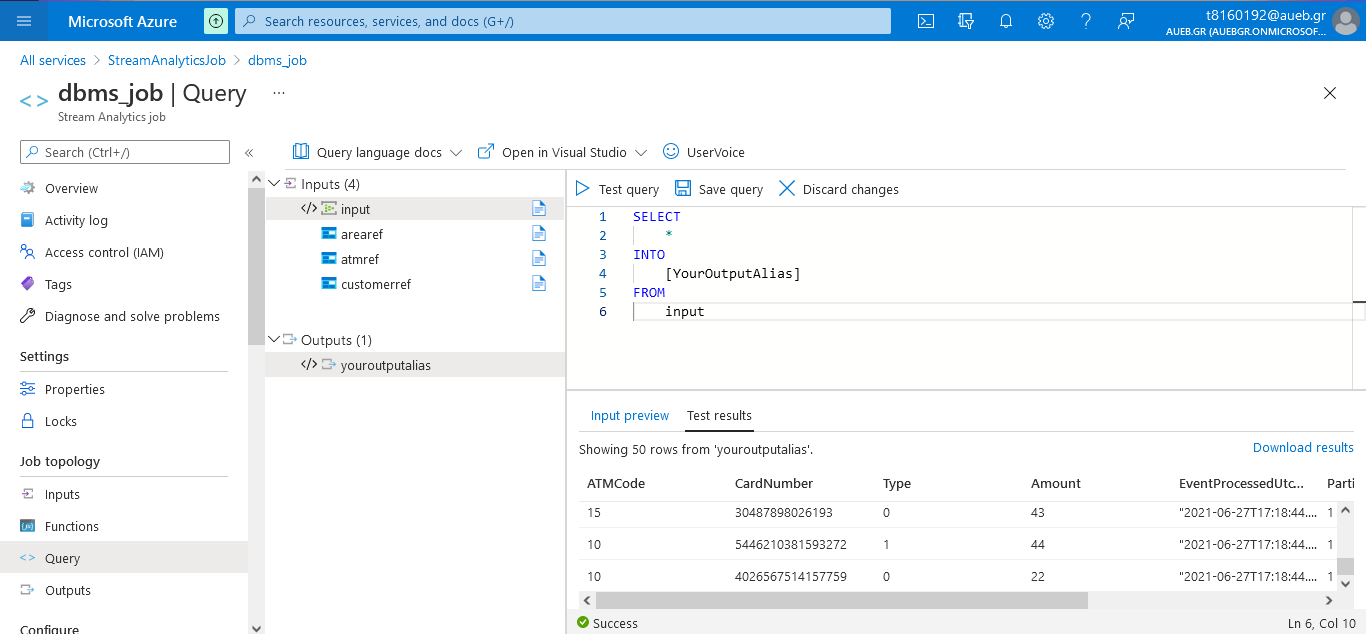

## 11. Output setup

A new container was created to store the job's output, with the job being updated accordingly.

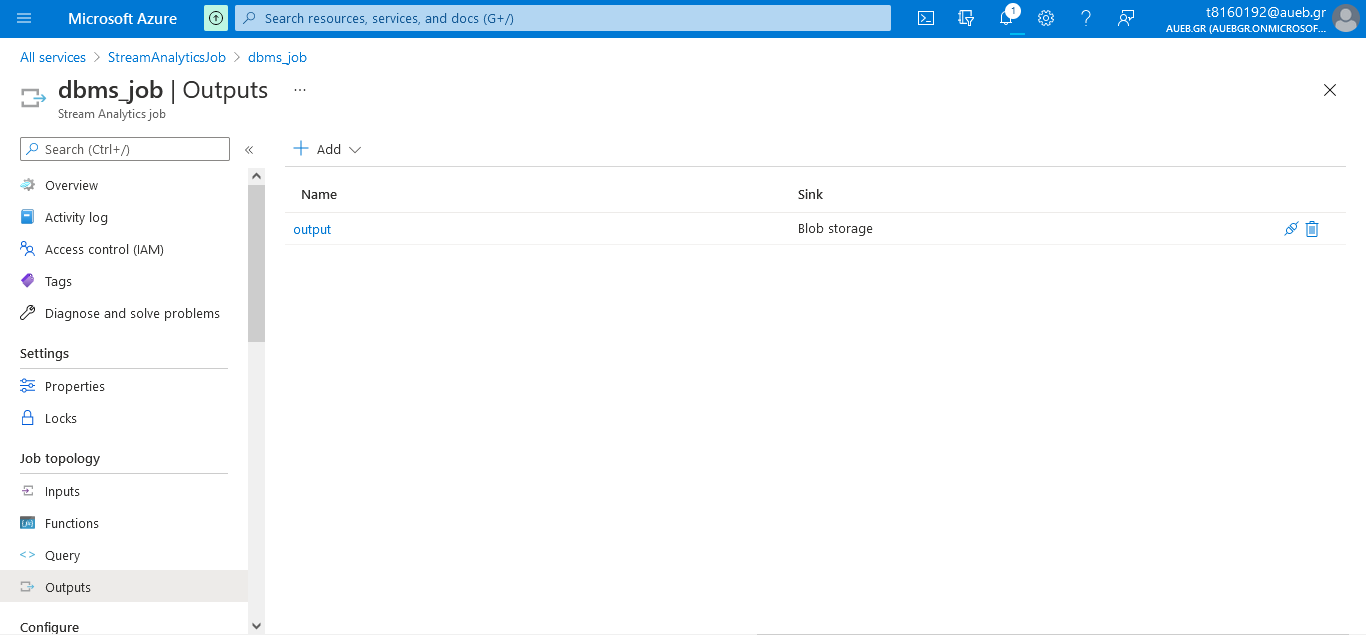

## 12. Queries

In the interest of reproducibility the jobs were tested using the data sampled in Section 10 of this report, however the jobs did also successfully produce blobs in the output container. The sampled data, as well as the full results of the queries have been provided alongside this report.

### Query 1

    SELECT
        SUM([Amount]) AS Amount
    INTO
        [output]
    FROM
        [input]
    WHERE
        [ATMCode] = 21 AND [Type] = 0
    GROUP BY [ATMCode], SlidingWindow(minute, 10)
    
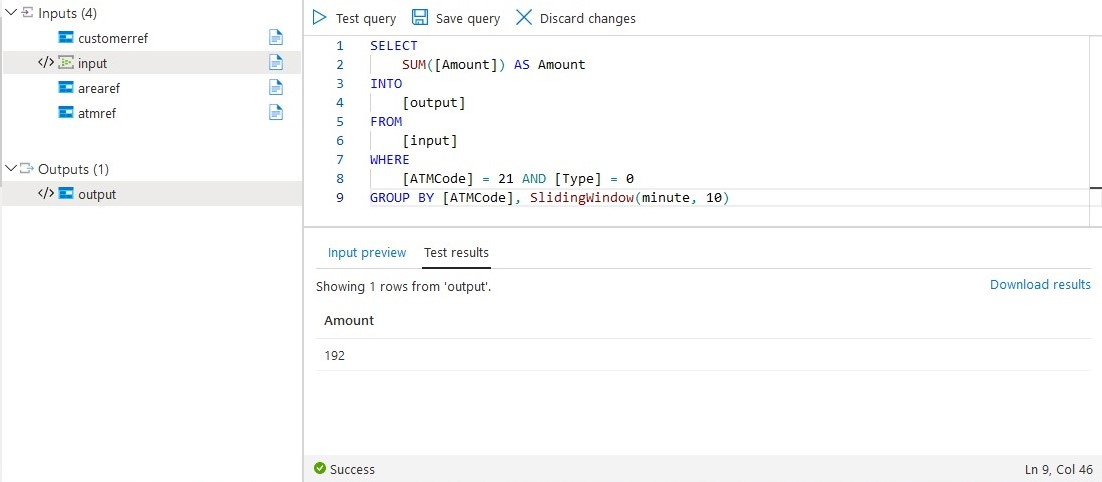

### Query 2

    SELECT
        SUM([Amount]) AS Amount
    INTO
        [output]
    FROM
        [input]
    WHERE
        [ATMCode] = 21 AND [Type] = 1
    GROUP BY [ATMCode], TumblingWindow(hour, 1)
    
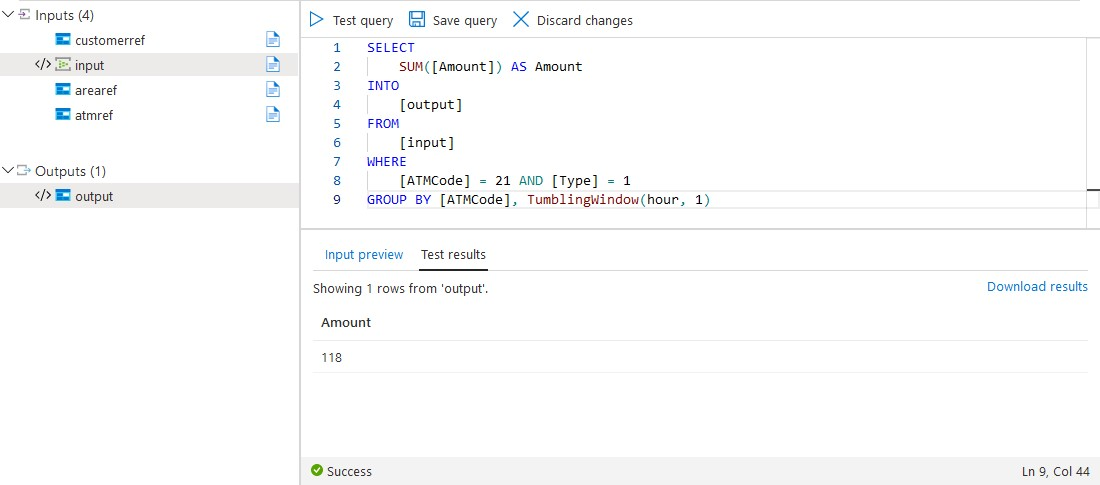

### Query 3

    SELECT
        SUM([Amount]) AS Amount
    INTO
        [output]
    FROM
        [input]
    WHERE
        [ATMCode] = 21 AND [Type] = 1
    GROUP BY [ATMCode], HoppingWindow(minute, 60, 30)
    
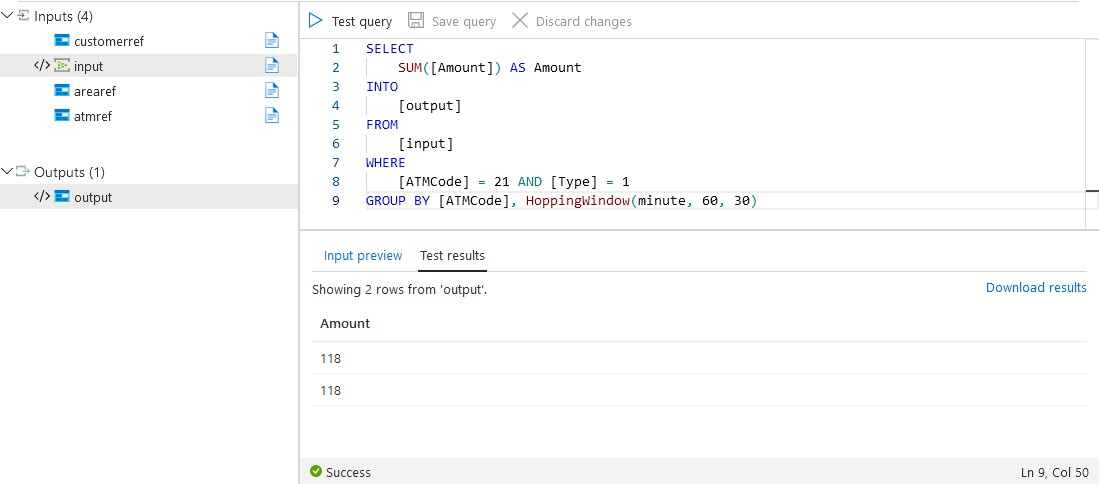

### Query 4

    SELECT
        [ATMCode], SUM([Amount]) AS Amount
    INTO
        [output]
    FROM
        [input]
    WHERE
        [Type] = 1
    GROUP BY [ATMCode], SlidingWindow(hour, 1)
    
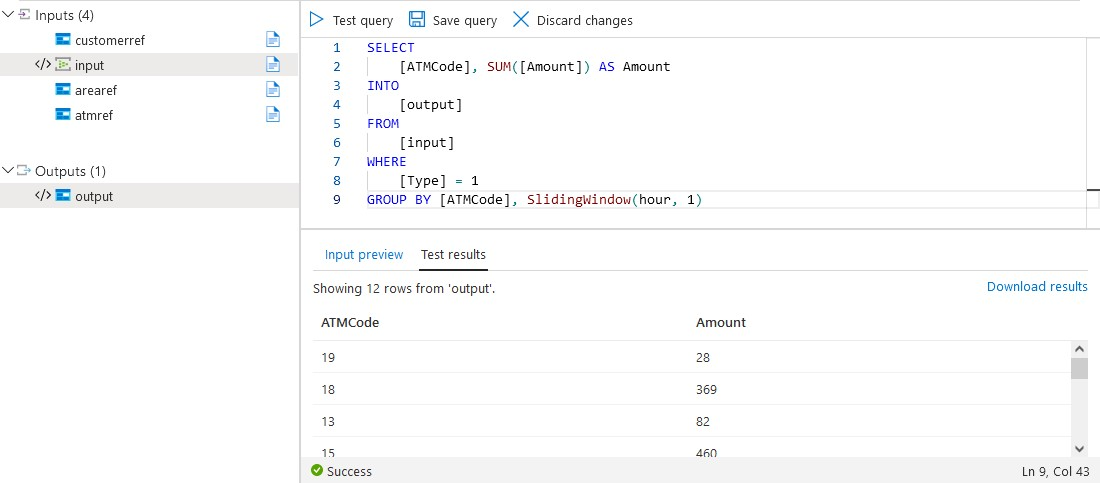

### Query 5

    SELECT
        [atmref].[area_code], SUM([input].[Amount]) AS Amount
    INTO
        [output]
    FROM
        [input]
        INNER JOIN [atmref] ON [input].[ATMCode] = [atmref].[atm_code]
    WHERE
        [input].[Type] = 1
    GROUP BY [atmref].[area_code], TumblingWindow(hour, 1)
    
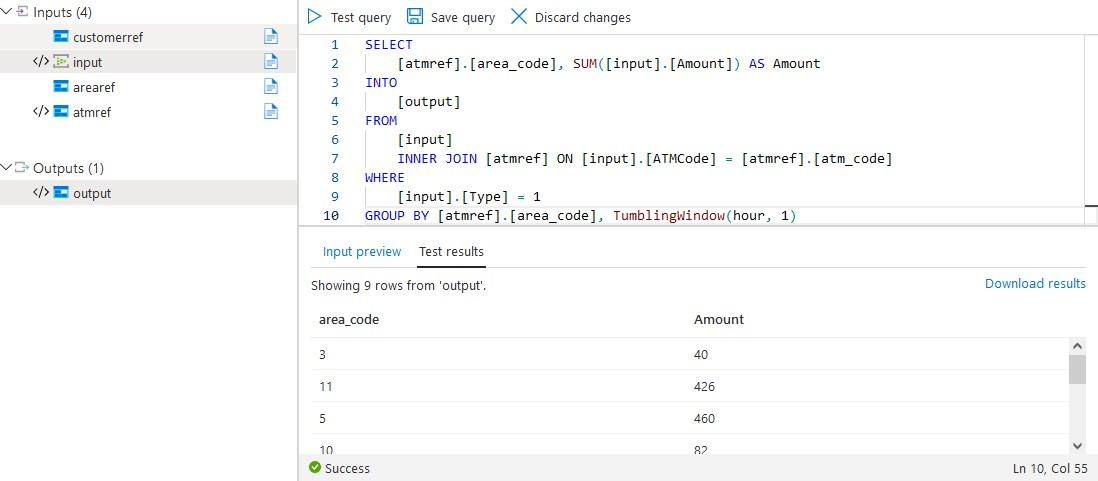

### Query 6

    SELECT
        [arearef].[area_city], [customerref].[gender], SUM([input].[Amount]) AS Amount
    INTO
        [output]
    FROM
        [input]
        INNER JOIN [atmref] ON [input].[ATMCode] = [atmref].[atm_code]
        INNER JOIN [arearef] ON [atmref].[area_code] = [arearef].[area_code]
        INNER JOIN [customerref] ON [input].[CardNumber] = [customerref].[card_number]
    GROUP BY [arearef].[area_city], [customerref].[gender], TumblingWindow(hour, 1)

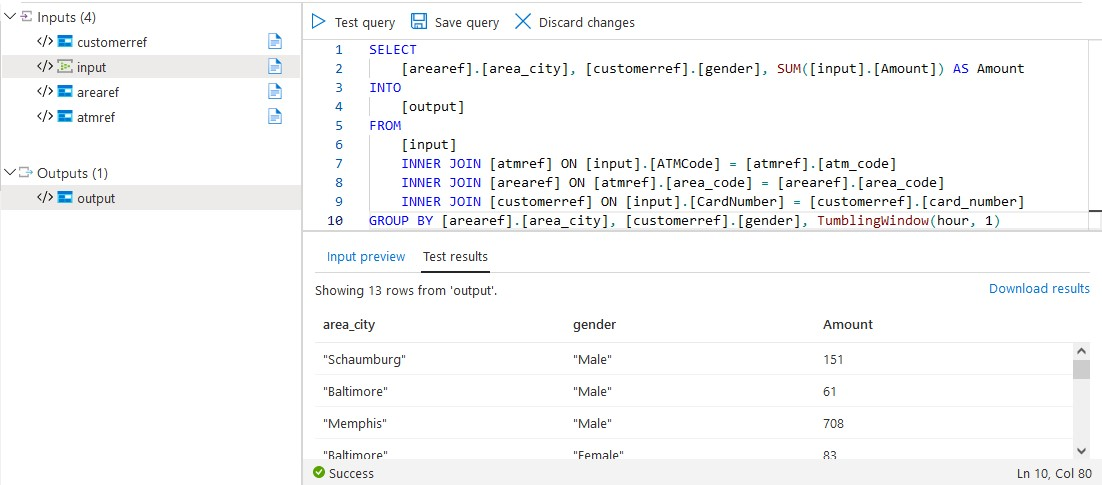

### Query 7

    WITH TypeOneCount AS (
        SELECT [CardNumber], COUNT(*) AS Count
        FROM [input]
        WHERE [Type] = 1
        GROUP BY [CardNumber], SlidingWindow(hour, 1)
    )
    SELECT
        [CardNumber], '1' AS Alert
    INTO
        [output]
    FROM
        [TypeOneCount]
    WHERE [Count] > 2
    
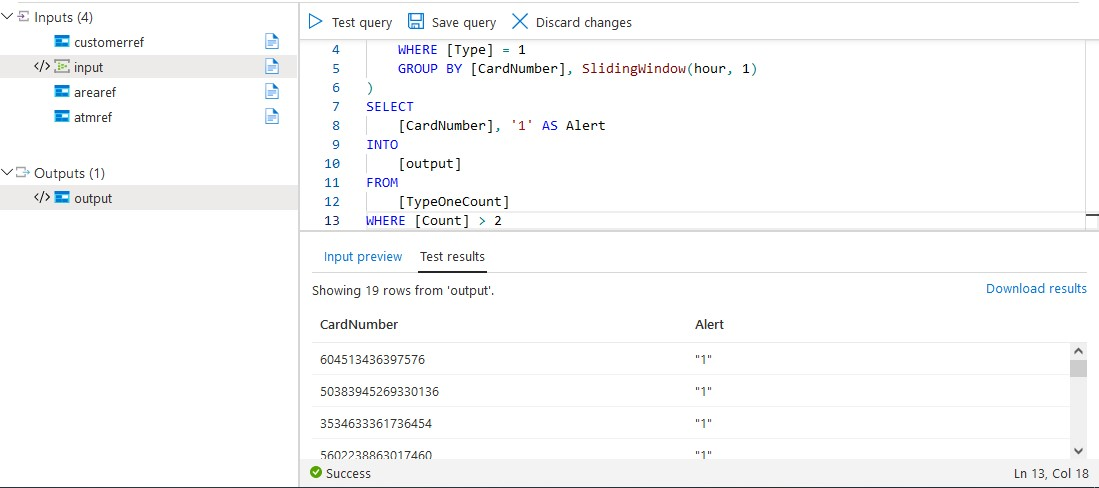

### Query 8

    WITH OutOfAreaTransactions AS (
        SELECT
            [input].[CardNumber], [input].[ATMCode], COUNT(*) AS Count
        FROM
            [input]
            INNER JOIN [atmref] ON [input].[ATMCode] = [atmref].[atm_code]
            INNER JOIN [customerref] ON [input].[CardNumber] = [customerref].[card_number]
        WHERE [atmref].[area_code] <> [customerref].[area_code]
        GROUP BY [input].[CardNumber], [input].[ATMCode], SlidingWindow(hour, 1))
    SELECT [CardNumber], [ATMCode], '1' AS Alert
    INTO [output]
    FROM [OutOfAreaTransactions]
    
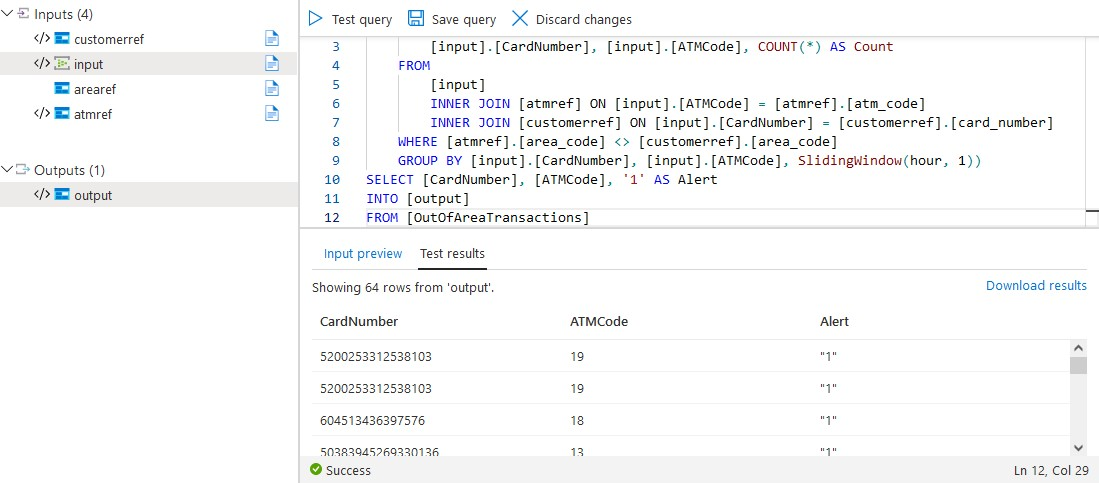

## 13. Conclusion

Through this project I was able to gain experience with setting up and using a real-life stream data analysis environment, as well as some ideas on the usage possibilities of Stream Analytics in projects of my own (such as a prototype smart parking system under development).

Considering this is the last practical project carried out in the scope of this course I feel compelled to express my feelings on the experiences I had through it, which were ones of real enjoyment, even through the occasional frustration when something would not work as intended. All in all, I would say that my repeated exposure to querying data helped me grow in thinking less like a "programmer" and more like a "data scientist", that is thinking less in terms of singular records and more in terms of sets of records.

In line with the above I plan on taking the "Business Intelligence and Big Data Analytics" course next semester as my last elective course towards my degree. Until then, wishes for a good summer!